**<div class="alert alert-danger"> 🛠 WORK IN PROGRESS 🛠<br>I am a person who loves data visualisation so this will be a main focus of this project so I will continue to add visualisations to this project over the coming days & weeks...<br>
This notebook will cover also data cleaning, feature engineering, exploratory data analysis, mapping, feature importance, correlations, machine learning, model selection and evaluation of the model</div>**

>*"There is magic in graphs. The profile of a curve reveals in a flash a whole situation — the life history of an epidemic, a panic, or an era of prosperity. The curve informs the mind, awakens the imagination, convinces"*.

# I. Obtaining Data

In [1]:
# Load packages
import pandas as pd # Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np # Foundational package for scientific computing
import scipy.stats as ss # Collection of functions for scientific computing and advance mathematics
import sklearn # Collection of machine learning algorithms

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
# import plotly.graph_objects as go
# import plotly.express as px
import sidetable
import missingno as msno

# Load the Datasets
df_train = pd.read_csv('Downloads/train.csv')
df_test = pd.read_csv('Downloads/test.csv')

!python --version
print(f'Seaborn {sns.__version__}\nMatplotlib {mpl.__version__}\nPandas {pd.__version__}\nNumpy {np.__version__}')

Python 3.9.7
Seaborn 0.11.2
Matplotlib 3.5.1
Pandas 1.3.5
Numpy 1.20.3


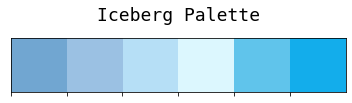

In [2]:
sns.palplot(['#71A6D1', '#9BC1E3', '#B6DFF6', '#DCF7FE', '#60C4EB', '#13ADEB'])
plt.title("Iceberg Palette", loc = 'center', fontfamily = 'monospace', fontsize = 18, y = 1.2);

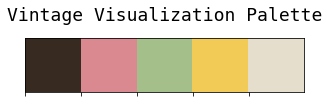

In [3]:
sns.palplot(['#372A21', '#D9898F', '#A4BF8A', '#F2CB57', '#E5DECC'])
plt.title("Vintage Visualization Palette", loc = 'center', fontfamily = 'monospace', fontsize = 18, y = 1.2);

# II. Titanic Disaster

RMS Titanic was a British passenger liner operated by the White Star Line and hailed as "unsinkable".<br> It sank in the Atlantic Ocean after striking an iceberg on the morning of 15 April 1912 during its maiden voyage from Southampton to New York City.<br> Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking of the Titanic one of the modern history's deadliest peacetime commercial marine disasters.

![Image of Titanic](https://fr.web.img3.acsta.net/r_654_368/newsv7/21/05/25/14/52/4327086.jpg)

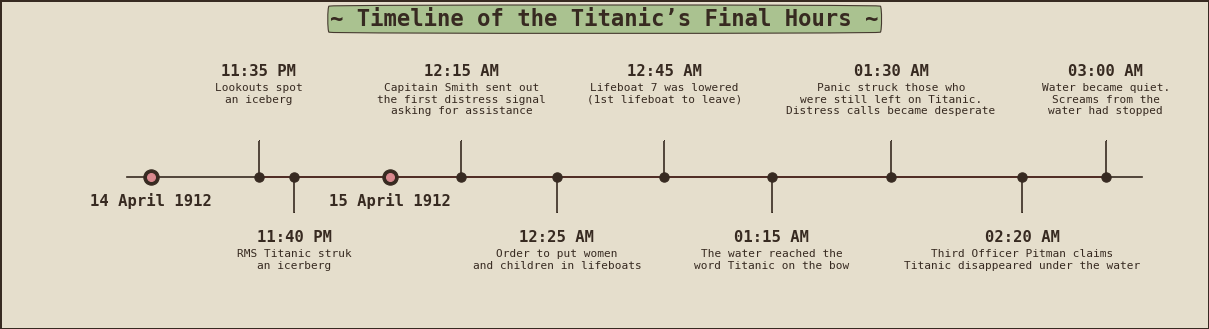

In [4]:
tl_dates = ["14 April 1912", "15 April 1912"]
tl_x = [1.2, 3.2]

tl_sub_x = [2.1, 2.4, 3.8, 4.6, 5.5, 6.4, 7.4, 8.5, 9.2]
tl_sub_times = ["11:35 PM", "11:40 PM", "12:15 AM", "12:25 AM", "12:45 AM", "01:15 AM", "01:30 AM", "02:20 AM", "03:00 AM"]

tl_text = ["Lookouts spot\nan iceberg",
           "RMS Titanic struk\nan icerberg",
           "Capitain Smith sent out\nthe first distress signal\nasking for assistance", 
           "Order to put women\nand children in lifeboats",
           "Lifeboat 7 was lowered\n(1st lifeboat to leave)",
           "The water reached the\nword Titanic on the bow",
           "Panic struck those who\nwere still left on Titanic.\nDistress calls became desperate",
           "Third Officer Pitman claims\nTitanic disappeared under the water",
           "Water became quiet.\nScreams from the\nwater had stopped"]

# Set figure & Axes
fig, ax = plt.subplots(figsize = (15, 4), constrained_layout = True, dpi = 80, facecolor = '#E5DECC', linewidth = 1, edgecolor = '#372A21')
ax.set_facecolor('#E5DECC')
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin = 0.1, xmax = 0.95, c = '#372A21', zorder = 1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 190, c = '#372A21', zorder = 2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s = 50, c = '#D9898F', zorder = 3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s = 70, c = '#372A21', zorder = 4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.4, 
            date, 
            ha = 'center', 
            fontfamily = 'monospace', 
            fontweight = 'bold',
            fontsize = 14,
            color = '#372A21')
    
# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.5
levels[1::2] = -0.5
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection = True)    
plt.setp(baseline, zorder = 0)
plt.setp(markerline, marker = ',', color = '#372A21')
plt.setp(stemline, color = '#372A21')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x) + 1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 2.3 * (idx%2) - 0.9, 
            time, 
            ha = 'center', 
            fontfamily = 'monospace', 
            fontweight = 'bold',
            fontsize = 14,
            color = '#372A21')
    
    ax.text(x, 2.3 * (idx%2) - 1, 
            txt,
            va = 'top', 
            ha = 'center', 
            fontfamily = 'monospace', 
            color = '#372A21')

# Spine
for spine in ["left", "top", "right", "bottom"] :
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([])

# Title
ax.set_title("~ Timeline of the Titanic’s Final Hours ~", fontweight = "bold", fontfamily = 'monospace', fontsize = 20, color = '#372A21', bbox = {'boxstyle' : 'round4', 'facecolor': '#A4BF8A', 'alpha': 0.9, 'pad': 0.14, 'edgecolor' : '#372A21'});

**[Women & Children First](https://en.wikipedia.org/wiki/Women_and_children_first)**

"*The phrase was popularised by its usage on the RMS Titanic. The Second Officer suggested to Captain Smith : "Hadn't we better get the women and children into the boats, sir ?" to which the captain responded : "Put the women and children in and lower away". <br>The First and Second officers (William McMaster Murdoch and Charles Lightoller) interpreted the evacuation order differently; Murdoch took it to mean women and children first, while Lightoller took it to mean women and children only. <br>Second Officer Lightoller lowered lifeboats with empty seats if there were no women and children waiting to board, while First Officer Murdoch allowed a limited number of men to board if all the nearby women and children had embarked. <br>As a consequence, 74% of the women and 52% of the children on board were saved, but only 20% of the men. Some officers on the Titanic misinterpreted the order from Captain Smith, and tried to prevent men from boarding the lifeboats. <br>It was intended that women and children would board first, with any remaining free spaces for men. Because not all women and children were saved on the Titanic, the few men who survived, like White Star official J. Bruce Ismay, were initially branded as cowards.*"

![Women and children first](https://sseahorse29.files.wordpress.com/2012/11/pg-3-titanic-itv.jpg)

# III. Glimpse of the Datasets

df_train & test CSV files are loaded into Pandas 'dataframe' objects. Dataframes are nothing but a 2 dimensional representation of the data containing rows and cols. Let us start by having a very high level look at the data

- Training set (train.csv)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 columns for each of the 891 passengers. One of them is the `Survived` flag. Our ML algorithms are supposed to learn from this `df_train` and then predict the `Survived` column for the `df_test` which does NOT contain this column.<br>
Notice that 3 of these 11 columns in df_train have missing data for `Age`, `Cabin` & `Embarked`.

- Test set (test.csv)µ

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


So we see that test data has 418 rows. It does NOT contain the `Survived` column. We have to predict this after we learn from the df_train. It has the remaining 11 columns and notice that here too `Age`, `Cabin` and `Fare` have missing data.

In [7]:
# Returns a concatenated dataframe of training and test set :
def concat_df(train_data, test_data) :
    return pd.concat([train_data, test_data], sort = True).reset_index(drop = True)

df = concat_df(df_train, df_test)

print(f'Combined dataset : {df.shape[0]} rows & {df.shape[1]} columns')

Combined dataset : 1309 rows & 12 columns


Now let's go through the features and describe a little :

<table><thead><tr><th>ATTRIBUTE</th><th colspan="2">DATA TYPE</th><th>DESCRIPTION</th><th>KEY</th></tr></thead><tbody><tr><td>Ticket</td><td rowspan="5">CATEGORICAL<br><br><br></td><td rowspan="3">Nominal</td><td>Ticket Number</td><td></td></tr><tr><td>Cabin</td><td>Cabin Number</td><td></td></tr><tr><td>Embarked</td><td>Port of Embarkation</td><td>C - Cherbourg<br>Q - Queenstown<br>S - Southampton</td></tr><tr><td>Sex</td><td>Dichotomous</td><td>Male or Female</td><td></td></tr><tr><td>Pclass</td><td>Ordinal</td><td>Proxy for socio-economic statut</td><td>1 - Upper<br>2 - Middle<br>3 - Lower</td></tr><tr><td>Passenger ID</td><td rowspan="6">NUMERIC</td><td rowspan="4">Discrete</td><td>Unique identifing # for each passenger</td><td></td></tr><tr><td>SibSp</td><td># of Siblings or Spouses</td><td></td></tr><tr><td>Parch</td><td># of Parents or Children</td><td></td></tr><tr><td>Survived</td><td>Target variable</td><td>0 - No<br>1 - Yes</td></tr><tr><td>Age</td><td rowspan="2">Continuous</td><td>Passenger Age</td><td></td></tr><tr><td>Fare</td><td>Passenger Fare</td><td></td></tr><tr><td>Name</td><td colspan="2">TEXT </td><td>Passenger Name</td><td></td></tr></tbody></table>


SPECIAL NOTES :

The Titanic dataset contains information on 1309 passengers (not the crew)

Fare is in Pre-1970 British Pounds (£)
- Conversion Factors:  1£ = 12s = 240d and 1s = 20d

Age is in Years<br>
- Fractional if Age less than One (1)
- If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.<br>
- Sibling : Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse : Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent : Mother or Father of Passenger Aboard Titanic
- Child : Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch = 0 for them. <br>As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## 1. Data Cleaning
The dataset were downloaded from [Kaggle](https://www.kaggle.com/c/titanic/data) and these inconsistency makes the data invalid and confusing when it comes to factual or historical value.<br>
[Encyclopedia Titanica](https://www.encyclopedia-titanica.org/) data seems to be regarded as the most definitive source for information about the Titanic passengers.

In [8]:
# Compilation of errors we have noticed :

# Age errors
df.loc[df['PassengerId'] == 631, 'Age'] = 47 # 80 actually used age at death
df.loc[df['PassengerId'] == 117, 'Age'] = 66 # 70
df.loc[df['PassengerId'] == 546, 'Age'] = 59 # 64
df.loc[df['PassengerId'] == 988, 'Age'] = 25 # 76 actually used age at death
df.loc[df['PassengerId'] == 223, 'Age'] = 41 # 51
df.loc[df['PassengerId'] == 264, 'Age'] = 45 # 40
df.loc[df['PassengerId'] == 1229, 'Age'] = 15 # 39
df.loc[df['PassengerId'] == 1031, 'Age'] = 42 # 40
df.loc[df['PassengerId'] == 799, 'Age'] = 45 # 30
df.loc[df['PassengerId'] == 697, 'Age'] = 19 # 44
df.loc[df['PassengerId'] == 290, ['Age', 'Name']] = [23, 'Connolly, Miss. Catherine "Kate"' ] # 22 & duplicates name
df.loc[df['PassengerId'] == 898, 'Age'] = 41 # 30
df.loc[df['PassengerId'] == 892, 'Age'] = 44 # 34
df.loc[df['PassengerId'] == 684, 'Age'] = 12 # 14.5
df.loc[df['PassengerId'] == 112, 'Age'] = 16 # 14.5
df.loc[df['PassengerId'] == 10, 'Age'] = 17 # 14
df.loc[df['PassengerId'] == 23, 'Age'] = 17 # 15
df.loc[df['PassengerId'] == 675, 'Age'] = 18 # 30
df.loc[df['PassengerId'] == 784, 'Age'] = 35 # NaN
df.loc[df['PassengerId'] == 129, 'Age'] = 2 # NaN
df.loc[df['PassengerId'] == 534, 'Age'] = 23 # NaN
df.loc[df['PassengerId'] == 271, 'Age'] = 28 # 42
df.loc[df['PassengerId'] == 1228, 'Age'] = 40 # 32

# Ford family
df.loc[df['PassengerId'] == 87, ['Age', 'Parch', 'SibSp']] = [14, 1, 3] # 16, 3, 1
df.loc[df['PassengerId'] == 148, ['Age', 'Parch', 'SibSp']] = [7, 1, 3] # 9, 2, 2
df.loc[df['PassengerId'] == 737, ['Age', 'Parch']] = [54, 4] # 48, 3
df.loc[df['PassengerId'] == 437, ['Age', 'Parch', 'SibSp']] = [20, 1, 3] # 21, 2, 2
df.loc[df['PassengerId'] == 1059, ['Parch', 'SibSp']] = [1, 3] # 2, 2

# Abbott family
df.loc[df['PassengerId'] == 280, ['Age', 'Parch', 'SibSp']] = [39, 2, 0] # 35, 1, 1
df.loc[df['PassengerId'] == 1284, ['Parch', 'SibSp']] = [1, 1] # 2, 0

# Fare errors
df.loc[df['PassengerId'] == 452	, ['Fare', 'Age']] = [6.19, 28] # 19, 26
df.loc[df['PassengerId'] == 491, ['Fare', 'Age']] = [6.19, 19] # 19, 26

# I found some children with this function : df[(df.Title == 'Miss') & (df.Parch != 0) & (df.Ticket_frequency > 1) & (df.Age.isnull())]
df.loc[df['PassengerId'] == 129, 'Age'] = 2 # NaN
df.loc[df['PassengerId'] == 230, 'Age'] = 12 # NaN
df.loc[df['PassengerId'] == 410, 'Age'] = 3 # NaN
df.loc[df['PassengerId'] == 486, 'Age'] = 8 # NaN
df.loc[df['PassengerId'] == 889, 'Age'] = 7 # NaN

# Passengers who travelled for free 
df.loc[df['PassengerId'] == 873, 'Fare'] = 0 # Seaman 
df.loc[df['PassengerId'] == 180, 'Ticket'] = 370160 # LINE Seaman
df.loc[df['PassengerId'] == 272, 'Ticket'] = 370160 # LINE Seaman
df.loc[df['PassengerId'] == 278, 'Age'] = 21 # 30 Guarantee group
df.loc[df['PassengerId'] == 303, 'Ticket'] = 370160 # LINE Seaman
df.loc[df['PassengerId'] == 414, 'Age'] = 21 # 30 Guarantee group
df.loc[df['PassengerId'] == 467, 'Age'] = 20 # 30 Guarantee group
df.loc[df['PassengerId'] == 482, 'Age'] = 38 # 30 Guarantee group
df.loc[df['PassengerId'] == 598, 'Ticket'] = 370160 # LINE Seaman
df.loc[df['PassengerId'] == 634, 'Age'] = 29 # 42 Guarantee group
df.loc[df['PassengerId'] == 733, 'Age'] = 42 # 30 Guarantee group
df.loc[df['PassengerId'] == 816, 'Age'] = 39 # 42 Personal valet to Joseph Bruce Ismay
df.loc[df['PassengerId'] == 1044, 'Ticket'] = 370160 # 3701 Seaman
df.loc[df['PassengerId'] == 1044, 'Ticket'] = 370160 # 3701 Seaman
df.loc[df['PassengerId'] == 1015, ['Age', 'Ticket', 'Fare']] = [27, 370160, 0] # 28, 392095, 7.5 Guarantee group

# Parch & SibSp

df.loc[df['PassengerId'] == 69, ['Parch', 'SibSp']] = [0, 0] # 2 & 4
df.loc[df['PassengerId'] == 1106, ['Parch', 'SibSp']] = [0, 0] # 2 & 4
df.loc[df['PassengerId'] == 424, 'SibSp'] = 2 # 1 (Husband & Sister)
df.loc[df['PassengerId'] == 611, 'SibSp'] = 2 # 1 (Husband & Sister)

# Samaan family
df.loc[df['PassengerId'] == 1189, ['Age', 'Parch', 'SibSp']] = [40, 2, 0] # NaN, 0, 2
df.loc[df['PassengerId'] == 49, ['Age', 'Parch', 'SibSp']] = [16, 1, 1] # NaN, 0, 2
df.loc[df['PassengerId'] == 921, ['Age', 'Parch', 'SibSp']] = [17, 1, 1] # NaN, 0, 2

# Sage family 
df.loc[df['PassengerId'] == 160, 'Age'] = 5 # NaN
df.loc[df['PassengerId'] == 181, 'Age'] = 7 # NaN
df.loc[df['PassengerId'] == 202, 'Age'] = 16 # NaN
df.loc[df['PassengerId'] == 325, 'Age'] = 19 # NaN
df.loc[df['PassengerId'] == 793, 'Age'] = 20 # NaN
df.loc[df['PassengerId'] == 847, 'Age'] = 18 # NaN
df.loc[df['PassengerId'] == 864, 'Age'] = 14 # NaN
df.loc[df['PassengerId'] == 1080, 'Age'] = 10 # NaN
df.loc[df['PassengerId'] == 1234, 'Age'] = 44 # NaN
df.loc[df['PassengerId'] == 1252, 'Age'] = 12 # 14.5
df.loc[df['PassengerId'] == 1257, 'Age'] = 44 # NaN

In [9]:
df[df.Ticket == '347088']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
63,4.0,NaN,S,27.9,"Skoog, Master. Harald",2,64,3,male,3,0.0,347088
167,45.0,NaN,S,27.9,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",4,168,3,female,1,0.0,347088
360,40.0,NaN,S,27.9,"Skoog, Mr. Wilhelm",4,361,3,male,1,0.0,347088
634,9.0,NaN,S,27.9,"Skoog, Miss. Mabel",2,635,3,female,3,0.0,347088
642,2.0,NaN,S,27.9,"Skoog, Miss. Margit Elizabeth",2,643,3,female,3,0.0,347088
819,10.0,NaN,S,27.9,"Skoog, Master. Karl Thorsten",2,820,3,male,3,0.0,347088


In [10]:
df[df.PassengerId == 168]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
167,45.0,NaN,S,27.9,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",4,168,3,female,1,0.0,347088


## 1. Statistic Summary

In [11]:
df.describe(exclude = ['object']) # Only NUMERIC data

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1077.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.548440,33.265049,0.381971,655.000000,2.294882,0.495034,0.383838
std,14.294878,51.772348,0.861607,378.020061,0.837836,1.038707,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.500000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,74.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [12]:
df.stb.counts(exclude = 'object') # Only NUMERIC data

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Survived,891,2,0.00,549,1.0000,342
Pclass,1309,3,3.00,709,2.0000,277
SibSp,1309,7,0.00,894,5.0000,6
Parch,1309,8,0.00,1001,6.0000,2
Age,1077,94,24.00,47,0.1700,1
Fare,1308,280,8.05,60,27.4458,1
PassengerId,1309,1309,1.00,1,1.0000,1


In [13]:
df.stb.freq(['Survived'], style = True)

,Survived,count,percent,cumulative_count,cumulative_percent
0,0.000000,549,61.62%,549,61.62%
1,1.000000,342,38.38%,891,100.00%


In [14]:
df.stb.freq(['Pclass'], style = True)

,Pclass,count,percent,cumulative_count,cumulative_percent
0,3,709,54.16%,709,54.16%
1,1,323,24.68%,"1,032",78.84%
2,2,277,21.16%,"1,309",100.00%


- Surprisingly, survival rate of the passengers is ~38%, which is the same result than the actual survival rate, whereas there are 418 lines missing in the test set
- More than half of the passengers were travelling in the 3rd class (~54%)
- Most of the passengers were under 30 years old
- Fare = 0 needs investigation

In [15]:
df.describe(include = ['object']) # Only CATEGORICAL data

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1308,2,927
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


In [16]:
df.stb.counts(include = 'object') # Only CATEGORICAL data

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Sex,1309,2,male,843,female,466
Embarked,1307,3,S,914,Q,123
Cabin,295,186,C23 C25 C27,6,B24,1
Ticket,1309,927,CA. 2343,11,PC 17482,1
Name,1309,1308,"Kelly, Mr. James",2,"Laleff, Mr. Kristo",1


In [17]:
df.stb.freq(['Embarked'], style = True)

,Embarked,count,percent,cumulative_count,cumulative_percent
0,S,914,69.93%,914,69.93%
1,C,270,20.66%,"1,184",90.59%
2,Q,123,9.41%,"1,307",100.00%


- Most of the passengers boarded from Southampton
- Ticket feature has high ratio (~29%) of duplicate values (unique = 927)
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin
- Name column contains 2 "Kelly, Mr. James"
    - No duplicates : "The body of fellow-third class passenger also named James Kelly was recovered". Source, [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-victim/james-kelly.html)

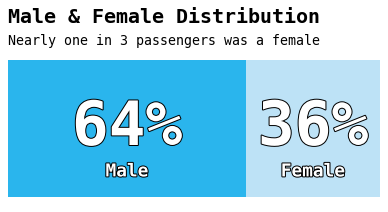

In [18]:
x = df.groupby(['Sex'])['Sex'].count()
y = len(df)
r = ((x / y)).round(2)
mf_ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1, 1, facecolor = 'white', figsize = (6, 2.5), dpi = 80)

ax.barh(mf_ratio.index, mf_ratio['male'], 
        color = '#13ADEB', alpha = 0.9, label = 'Male')
ax.barh(mf_ratio.index, mf_ratio['female'], left = mf_ratio['male'], 
        color = '#B6DFF6', alpha = 0.9, label = 'Female')

ax.set(xlim = [0, 1])
ax.tick_params(left = False, 
               bottom = False, 
               labelleft = False, 
               labelbottom = False)

for s in ['top', 'left', 'right', 'bottom'] :
    ax.spines[s].set_visible(False)
    
# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['male'][i] * 100)}%", 
                   xy = (mf_ratio['male'][i] / 2, i),
                   va = 'center', ha = 'center', fontsize = 55, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])

    ax.annotate("Male", 
                   xy = (mf_ratio['male'][i] / 2, -0.25),
                   va = 'center', ha = 'center', fontsize = 16, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['female'][i] * 100)}%", 
                   xy = (mf_ratio['male'][i] + mf_ratio['female'][i] / 2, i),
                   va = 'center', ha = 'center', fontsize = 55, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])
    ax.annotate("Female", 
                   xy = (mf_ratio['male'][i] + mf_ratio['female'][i] / 2, -0.25),
                   va = 'center', ha = 'center', fontsize = 16, fontweight = 'bold', fontfamily = 'monospace',
                   color = 'white', path_effects = [pe.withStroke(linewidth = 1.8, foreground = "black")])

# Title & Subtitle
fig.text(0.125,1.03,'Male & Female Distribution', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         fontweight = 'bold',
         color = 'k')
fig.text(0.125,0.92,'Nearly one in 3 passengers was a female', 
         fontfamily = 'monospace', 
         fontsize = 12,
         color = 'k')  

# Removing legend due to labelled plot
ax.legend().set_visible(False)

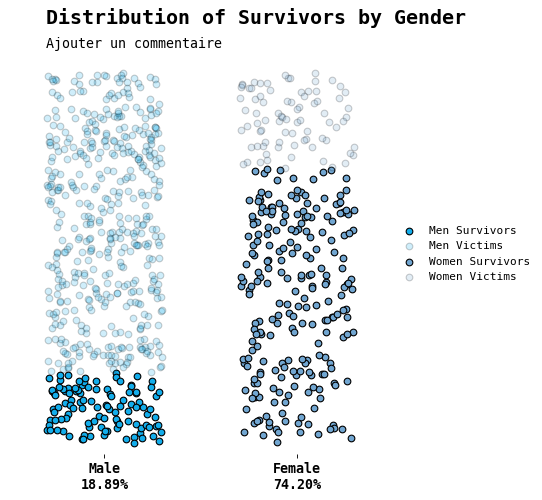

In [19]:
survival_rate = df.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)]))
male_neg = np.random.uniform(male_rate, 1, len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)]))
female_pos = np.random.uniform(0, female_rate, len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)]))
female_neg = np.random.uniform(female_rate, 1, len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)]))

fig, ax = plt.subplots(1, 1, figsize = (7, 6), dpi = 80)

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), 
           male_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Men Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), 
           male_neg, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.2, 
           label = 'Men Victims')

# Female Stripplot
ax.scatter(1 + np.random.uniform(-0.3, 0.3, len(female_pos)),
           female_pos, 
           color = '#71A6D1', 
           edgecolor = 'k', 
           label ='Women Survivors')
ax.scatter(1 + np.random.uniform(-0.3, 0.3, len(female_neg)), 
           female_neg, 
           color = '#71A6D1', 
           edgecolor = 'k', 
           alpha = 0.2, 
           label = 'Women Victims')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels([f'Male\n{male_rate[0] * 100:.2f}%', 
                    f'Female\n{female_rate[0] * 100:.2f}%'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.09, 1, 'Distribution of Survivors by Gender', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18)    
fig.text(0.09, 0.95, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)    

ax.legend(loc = (0.8, 0.4), prop = 'monospace', edgecolor = 'None', fontsize = 12)
plt.tight_layout()

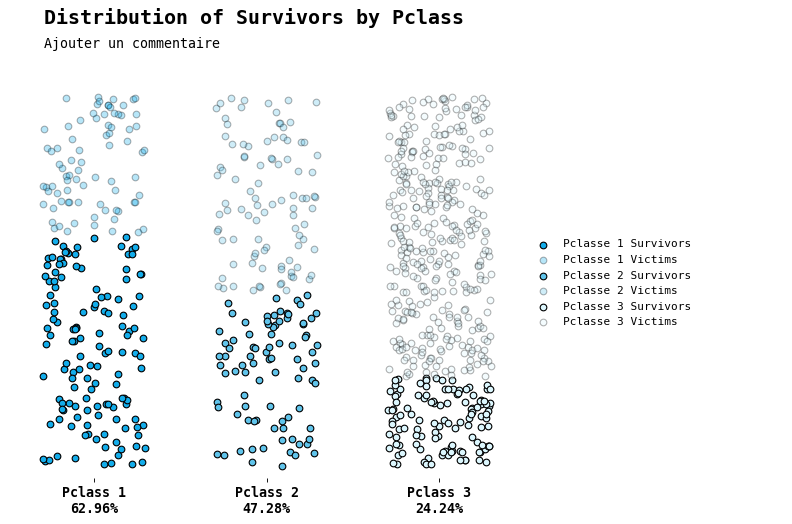

In [20]:
survival_rate = df.groupby(['Pclass']).mean()[['Survived']]
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0)]))

fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 80)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] * 100:.2f}%', 
                    f'Pclass 2\n{p2_rate[0] * 100:.2f}%', 
                    f'Pclass 3\n{p3_rate[0] * 100:.2f}%'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.06, 1.05, 'Distribution of Survivors by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'left')    
fig.text(0.06, 1, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend(loc = (0.67, 0.35), prop = 'monospace', edgecolor = 'None')
plt.tight_layout()

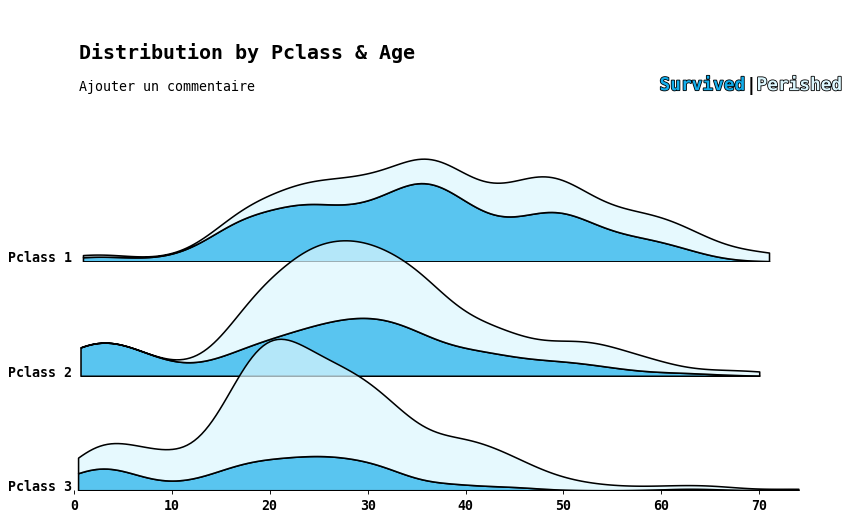

In [21]:
fig = plt.figure(figsize = (12, 8), dpi = 80)
gs = fig.add_gridspec(3, 1)
gs.update(hspace = -0.55)

axes = list()
for idx, cls in zip(range(3), sorted(df['Pclass'].unique())) :
    axes.append(fig.add_subplot(gs[idx, 0]))
    sns.kdeplot(x = 'Age', 
                data = df[df['Pclass'] == cls], 
                fill = True,
                ax = axes[idx],
                cut = 0,
                bw_method = 0.25, 
                lw = 1.4,
                edgecolor = 'black',
                hue = 'Survived', 
                palette = {0 : "#DCF7FE", 1 : "#13ADEB"},
                multiple = 'stack',
                alpha = 0.7) 
    
    axes[idx].set_ylim(0, 0.065)
    axes[idx].set_xlim(0, 76)
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    axes[idx].spines[["top","right","left","bottom"]].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2, 0, 
                   f"Pclass {cls}",
                   fontweight = "bold", 
                   fontfamily = 'monospace', 
                   fontsize = 12,
                   ha = "right")
    if idx != 3 : axes[idx].get_legend().remove()
axes[2].set_xticks(np.arange(0, 80, 10))
axes[2].set_xticklabels(('0', '10', '20', '30', '40', '50', '60', '70'),
                        fontweight = 'bold', 
                        fontfamily = 'monospace', 
                        fontsize = 12)
fig.text(0.13, 0.8, "Distribution by Pclass & Age",
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'left')
fig.text(0.13, 0.75, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)
fig.text(0.735, 0.75, 'Survived', 
         fontsize = 16, 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         ha = 'left',
         color = '#13ADEB', 
         path_effects = [pe.withStroke(linewidth = 1.5,
                                       foreground = "black")])
fig.text(0.825, 0.75, '|', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = 'black')
fig.text(0.836, 0.75, 'Perished', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = '#DCF7FE', 
         path_effects = [pe.withStroke(linewidth = 1.5, 
                                       foreground = "black")]);

## 2. Missing Values & Duplicates

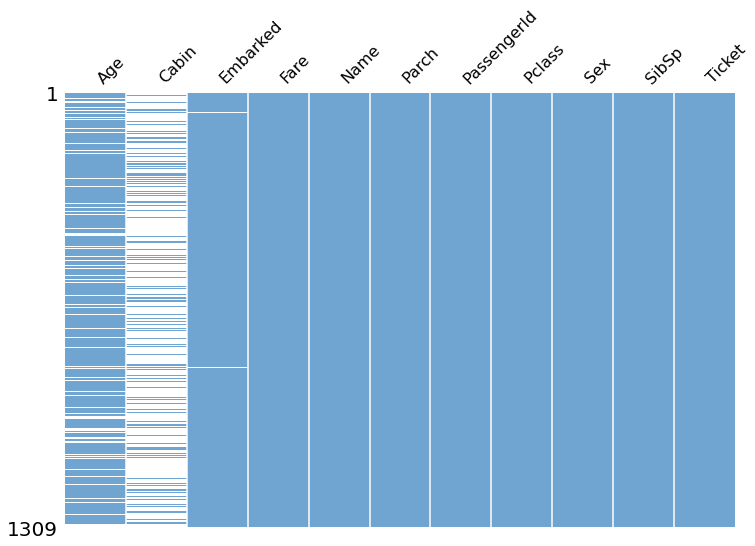

In [22]:
missing = df.drop('Survived', axis = 1)
msno.matrix(missing, figsize = (12, 8), color = (0.44, 0.65, 0.82), sparkline = False);

In [23]:
display(missing.stb.missing(clip_0 = True, style = True))
print(f'\nThere are {missing.duplicated().sum()} duplicates, but {len(missing.columns[missing.isna().any()].tolist())} attributes have NaN values.')

,missing,total,percent
Cabin,"1,014","1,309",77.46%
Age,232,"1,309",17.72%
Embarked,2,"1,309",0.15%
Fare,1,"1,309",0.08%



There are 0 duplicates, but 4 attributes have NaN values.


- With 77% missing data the `Cabin` info seems pretty useless 😟
- Roughly 1 in 5 `Age` are missing
- The `Embarked` needs to be fixed and we also have 1 `Fare` missing from the test set

# IV. Data Prepocessing

## 1. Feature Engineering 

### Name Extraction

In [24]:
# Use a regular expression to search for a title. Titles always consist of capital and lowercase letters, and end with a period
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

- The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand = False` flag returns a DataFrame.

In [25]:
pd.crosstab(df.Title, df.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


- All the titles belongs to one kind of gender except for "Dr"
- The title "Master" is an old title that referred to boys under a certain age

### Title Synthesis

- Remember "Women and children first" :
    - Being a child improves your chances of survival so we list all children aged 14 or under who were aboard the Titanic

In [26]:
# Condense the title into smaller and more meaningful categories
def replace_titles(x) :
    title = x['Title']
    if title in ['Don', 'Sir', 'Capt', 'Col', 'Major', 'Rev', 'Jonkheer'] : # Rare male titles to Children or Mr
        if x['Age'] < 14.5 :
            return 'Children'
        else :
            return 'Mr'
    elif title in ['Dr'] : # Dr to Mr or Mrs
        if x['Sex'] == 'male' :
            return 'Mr'
        else :
            return 'Mrs'
    elif title in ['Master'] : # Master to Children
        return 'Children'
    elif title in ['Lady', 'Countess', 'Dona', 'Mme', 'Miss', 'Mlle', 'Ms'] : # Rare female titles to Children or Mrs
        if x['Age'] < 14.5 :
            return 'Children'
        else : 
            return 'Mrs'
    elif title in ['Mr'] : # Mr or Children
        if x['Age'] < 14.5 :
            return 'Children'
        else :
            return 'Mr'
    elif title in ['Mrs'] : # Mrs or Children
        if x['Age'] < 14.5 :
            return 'Children'
        else :
            return 'Mrs'
    else:
        return title

# Run the function
df['Title'] = df.apply(replace_titles, axis = 1)

In [27]:
pd.crosstab(df.Title, 
            df.Sex,
            margins = True,
            margins_name = 'Subtotals')

Sex,female,male,Subtotals
Title,,,
Children,57,67,124
Mr,0,776,776
Mrs,409,0,409
Subtotals,466,843,1309


- Fantastic ! [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/children-on-titanic/) counts 128 children on the Titanic. With the function and some data cleaning we're very close 🥳

### Title Encoding

In [28]:
# Convert Title to ordinal variable
df['Title_Encoding'] = df["Title"].map({"Children" : 0, "Mr" : 1, "Mrs" : 2})

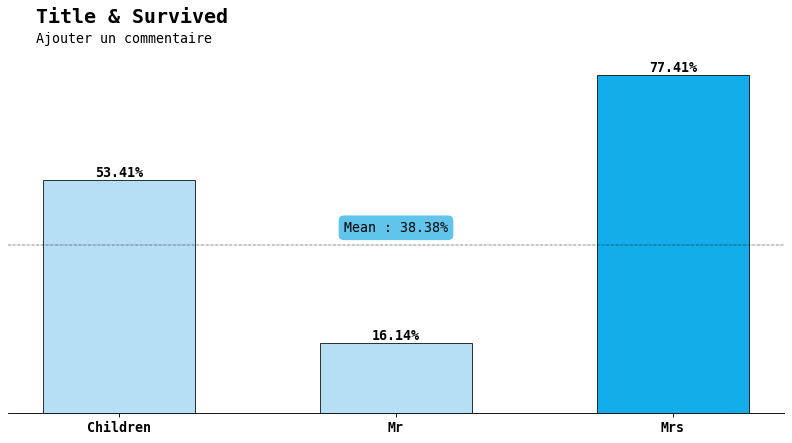

In [29]:
title_ratio = df.groupby('Title_Encoding')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi = 80)

color_map = ['#B6DFF6' for _ in range(len(title_ratio))]
color_map[np.argmax(title_ratio)] = ['#13ADEB'][0]


bars = ax.bar(title_ratio.index, 
              title_ratio, 
              color = color_map, 
              width = 0.55, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
mean = df['Survived'].mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Mean : {mean :.2f}%", 
            xy = (1, mean + 4),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Title & Survived', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(np.arange(0, max(title_ratio.index + 1)))
ax.set_xticklabels(['Children', 'Mr', 'Mrs'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.5)
ax.set_ylim(0, 80)

fig.tight_layout()

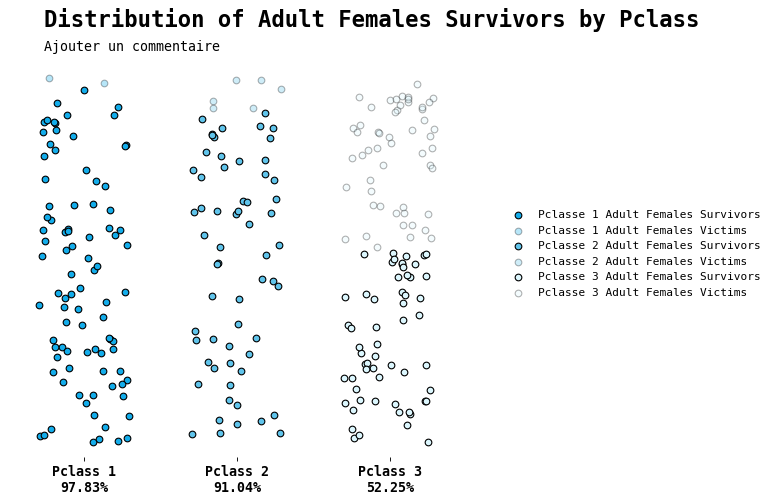

In [30]:
female_survival_rate = df[['Pclass', 'Title_Encoding', 'Survived']].groupby(['Pclass', 'Title_Encoding']).mean()
p1_rate = female_survival_rate.loc[1, 2]
p2_rate = female_survival_rate.loc[2, 2]
p3_rate = female_survival_rate.loc[3, 2]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 2)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Title_Encoding'] == 2)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Title_Encoding'] == 2)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Title_Encoding'] == 2)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Title_Encoding'] == 2)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Title_Encoding'] == 2)]))

fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 80)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Adult Females Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Adult Females Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Adult Females Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Adult Females Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Adult Females Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Adult Females Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] * 100:.2f}%', 
                    f'Pclass 2\n{p2_rate[0] * 100:.2f}%', 
                    f'Pclass 3\n{p3_rate[0] * 100:.2f}%'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.06, 1, 'Distribution of Adult Females Survivors by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 20, 
         ha = 'left')    
fig.text(0.06, 0.95, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend(loc = (0.72, 0.37), prop = 'monospace', edgecolor = 'None')
plt.tight_layout()

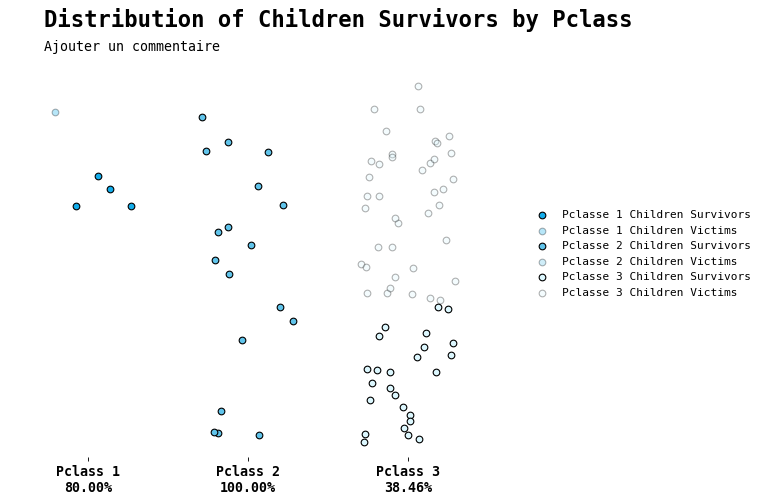

In [31]:
children_survival_rate = df[['Pclass', 'Title_Encoding', 'Survived']].groupby(['Pclass', 'Title_Encoding']).mean()
p1_rate = children_survival_rate.loc[1, 0]
p2_rate = children_survival_rate.loc[2, 0]
p3_rate = children_survival_rate.loc[3, 0]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Title_Encoding'] == 0)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Title_Encoding'] == 0)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Title_Encoding'] == 0)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Title_Encoding'] == 0)]))

fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 80)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Children Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Children Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Children Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Children Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Children Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Children Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] * 100:.2f}%', 
                    f'Pclass 2\n{p2_rate[0] * 100:.2f}%', 
                    f'Pclass 3\n{p3_rate[0] * 100:.2f}%'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.06, 1, 'Distribution of Children Survivors by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 20, 
         ha = 'left')    
fig.text(0.06, 0.95, 'Ajouter un commentaire', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend(loc = (0.72, 0.37), prop = 'monospace', edgecolor = 'None')
plt.tight_layout()

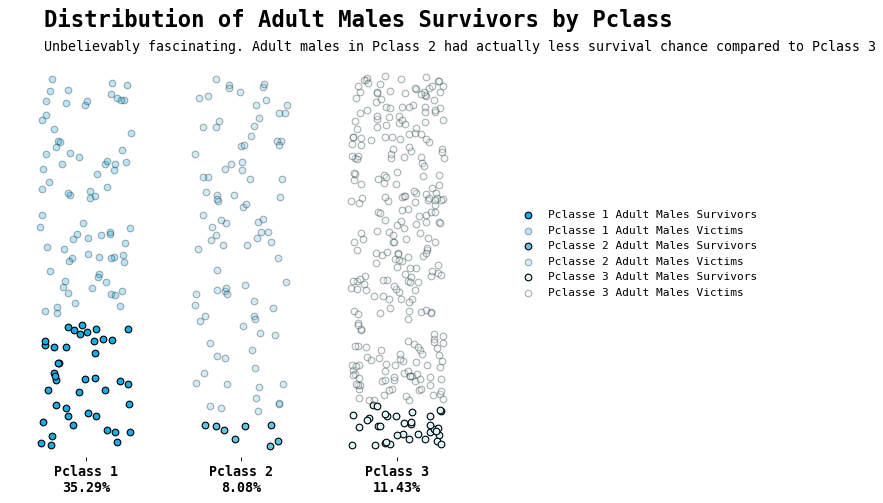

In [32]:
male_survival_rate = df[['Pclass', 'Title_Encoding', 'Survived']].groupby(['Pclass', 'Title_Encoding']).mean()
p1_rate = male_survival_rate.loc[1, 1]
p2_rate = male_survival_rate.loc[2, 1]
p3_rate = male_survival_rate.loc[3, 1]

p1_pos = np.random.uniform(0, p1_rate, len(df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Title_Encoding'] == 1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(df[(df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Title_Encoding'] == 1)]))
p2_pos = np.random.uniform(0, p2_rate, len(df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Title_Encoding'] == 1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(df[(df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Title_Encoding'] == 1)]))
p3_pos = np.random.uniform(0, p3_rate, len(df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Title_Encoding'] == 1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(df[(df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Title_Encoding'] == 1)]))

fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 80)

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), 
           p1_pos, 
           color = '#13ADEB', 
           edgecolor = 'k', 
           label = 'Pclasse 1 Adult Males Survivors')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), 
           p1_neg, color = '#13ADEB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 1 Adult Males Victims')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), 
           p2_pos, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           label = 'Pclasse 2 Adult Males Survivors')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), 
           p2_neg, 
           color = '#60C4EB', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 2 Adult Males Victims')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), 
           p3_pos, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           label = 'Pclasse 3 Adult Males Survivors')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), 
           p3_neg, 
           color = '#DCF7FE', 
           edgecolor = 'k', 
           alpha = 0.3, 
           label = 'Pclasse 3 Adult Males Victims')

# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([f'Pclass 1\n{p1_rate[0] * 100:.2f}%', 
                    f'Pclass 2\n{p2_rate[0] * 100:.2f}%', 
                    f'Pclass 3\n{p3_rate[0] * 100:.2f}%'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_yticks([], minor = False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom'] :
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.06, 1, 'Distribution of Adult Males Survivors by Pclass', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 20, 
         ha = 'left')    
fig.text(0.06, 0.95, 'Unbelievably fascinating. Adult males in Pclass 2 had actually less survival chance compared to Pclass 3', 
         fontfamily = 'monospace',
         fontsize = 12)
ax.legend(loc = (0.72, 0.37), prop = 'monospace', edgecolor = 'None')
plt.tight_layout()

### Ticket Frequency Encoding

Many passengers travelled along with groups. Those groups consist of family, friends, neighbours, nannies, maids etc.<br>In most cases, they had the same ticket number

In [33]:
# Creating new feature
df['Ticket_frequency'] = df['Ticket'].map(df['Ticket'].value_counts())

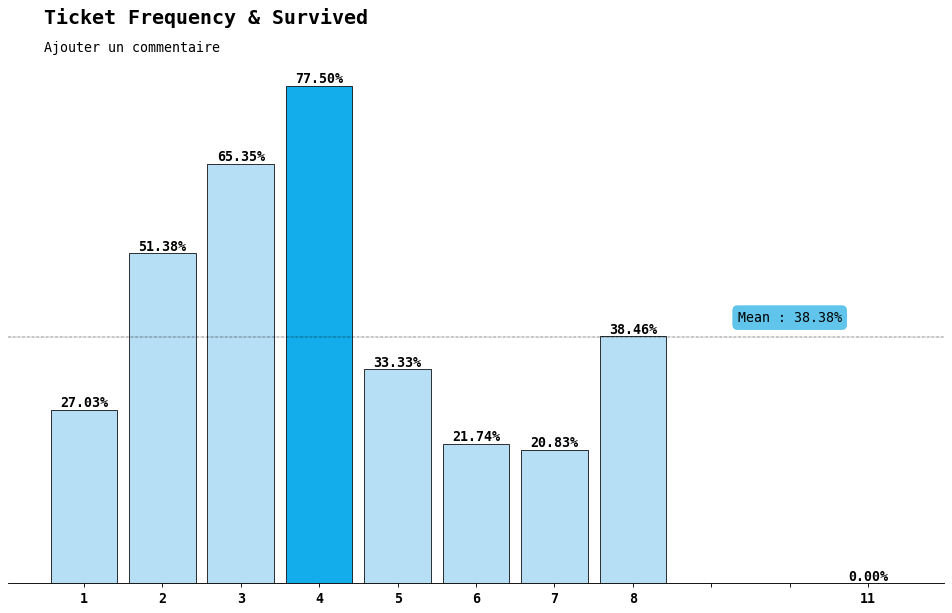

In [34]:
ticket_ratio = df.groupby('Ticket_frequency')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi = 80)

color_map = ['#B6DFF6' for _ in range(len(ticket_ratio))]
color_map[np.argmax(ticket_ratio)] = ['#13ADEB'][0]


bars = ax.bar(ticket_ratio.index, 
              ticket_ratio, 
              color = color_map, 
              width = 0.85, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
mean = df['Survived'].mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Mean : {mean :.2f}%", 
            xy = (10, mean + 3),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Ticket Frequency & Survived', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(np.arange(1, max(ticket_ratio.index + 1)))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '', '', '11'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_ylim(0, 80)

fig.tight_layout()

In [35]:
pd.pivot_table(df, index = ['Ticket_frequency'], aggfunc = ['median'])

median                                                   \
                    Age     Fare Parch PassengerId Pclass SibSp Survived   
Ticket_frequency                                                           
1                  28.0   8.0500     0       663.0      3   0.0      0.0   
2                  30.0  26.0000     0       632.5      2   1.0      1.0   
3                  26.0  26.0000     1       617.0      2   1.0      1.0   
4                  29.5  93.5000     1       734.5      1   1.0      1.0   
5                  25.5  65.0000     1       701.0      2   1.0      0.0   
6                  23.5  29.1250     2       469.0      3   1.0      0.0   
7                  18.0  39.6875     2       656.0      3   2.0      0.0   
8                  21.0  51.6979     1       661.5      3   0.5      0.0   
11                 16.0  69.5500     2       847.0      3   8.0      0.0   

                                 
                 Title_Encoding  
Ticket_frequency                 
1                             1  
2                             1  
3                             1  
4                             1  
5                             1  
6                             1  
7                             1  
8                             1  
11                            1

### Parch & SibSp Synthesis

In [36]:
# Creating new feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

- SibSp and Parch can be combined into a new attribute FamilySize to give a better overview of the passengers with families

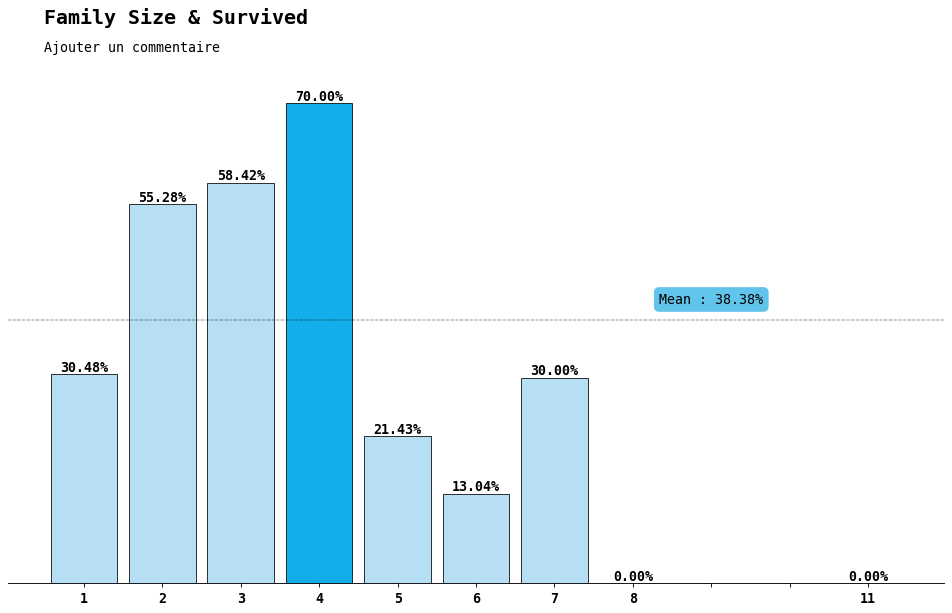

In [37]:
family_ratio = df.groupby('FamilySize')['Survived'].mean() * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 7), dpi = 80)

color_map = ['#B6DFF6' for _ in range(len(family_ratio))]
color_map[np.argmax(family_ratio)] = ['#13ADEB'][0]


bars = ax.bar(family_ratio.index, 
              family_ratio, 
              color = color_map, 
              width = 0.85, 
              edgecolor = 'black', 
              linewidth = 0.7)

ax.spines[["top","right","left"]].set_visible(False)
ax.bar_label(bars, 
             fmt = '%.2f%%', 
             fontsize = 12, 
             fontfamily = 'monospace',
             fontweight = 'bold')

# mean line + annotation
mean = df['Survived'].mean() * 100
ax.axhline(mean,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Mean : {mean :.2f}%", 
            xy = (9, mean + 3),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))

# Title & Subtitle    
fig.text(0.05, 1.06, 'Family Size & Survived', 
         fontsize = 18, 
         fontweight = 'bold', 
         fontfamily = 'monospace')
fig.text(0.05, 1.01, 'Ajouter un commentaire', 
         fontsize = 12, 
         fontweight = 'light', 
         fontfamily = 'monospace')

ax.set_yticks([])
ax.set_xticks(np.arange(1, max(family_ratio.index + 1)))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '', '', '11'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.set_ylim(0, 75)

fig.tight_layout()

⚠️ FamilySize excludes friends, neighbours, uncles, aunts, nieces, nephews, cousins, brothers & sisters-in-law
- Therefore, Ticket_frequency seems more suitable to classify the passenger groups

### Fare Transformation

`Fare` is actually the total fare for a group

In [38]:
# Let us get fare per person
df['Pfare'] = df['Fare'] / df['Ticket_frequency']

In [39]:
df['Fare'].describe()

count    1308.000000
mean       33.265049
std        51.772348
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [40]:
df['Pfare'].describe()

count    1308.000000
mean       14.727197
std        13.566226
min         0.000000
25%         7.550000
50%         8.050000
75%        15.000000
max       128.082300
Name: Pfare, dtype: float64

## 2. Handling Missing Data

### Age Missing Values

In [41]:
df.groupby(['Pclass', 'Title_Encoding']).agg(Passengers_With_NaN = ('Age', 'size'), 
                                    Passengers = ('Age', 'count'), 
                                    Mean_Age = ('Age', 'mean'), 
                                    Median_Age = ('Age', 'median'), 
                                    Min_Age = ('Age', 'min'), 
                                    Max_Age = ('Age', 'max'))
# Title_Encoding = (0 = Children) ; (1 = adult males) ; (2 = adult females)

Passengers_With_NaN  Passengers   Mean_Age  Median_Age  \
Pclass Title_Encoding                                                           
1      0                                 7           7   7.274286         6.0   
       1                               174         149  41.768456        42.0   
       2                               142         131  37.091603        36.0   
2      0                                26          26   5.009615         3.5   
       1                               159         152  32.845395        30.0   
       2                                92          89  30.893258        29.0   
3      0                                91          84   6.351190         6.0   
       1                               443         317  28.329653        26.0   
       2                               175         122  27.081967        24.0   

                       Min_Age  Max_Age  
Pclass Title_Encoding                    
1      0                  0.92     14.0  
       1                 17.00     71.0  
       2                 15.00     64.0  
2      0                  0.67     14.0  
       1                 16.00     70.0  
       2                 15.00     60.0  
3      0                  0.17     14.0  
       1                 15.00     74.0  
       2                 15.00     63.0

We cannot fill the NaNs for age with the overall median age because : 
- First class passengers were much older than the other classes
- Male passangers were older than female
- Obviously, adult passengers were much older than children

In [42]:
# We need to dig a little deeper and determine the median Age per Pclass and Title
df['Age'].fillna(df.groupby(["Pclass", "Title_Encoding"])['Age'].transform('median'), inplace = True)
# Check missing Age values
print(f'Missing values for Age : {df.Age.isna().sum()}')

Missing values for Age : 0


### Embarked Missing Values

In [43]:
df[df['Embarked'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Mrs,2,2,1,40.0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,2,2,1,40.0


Data science is about research too :
- When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard
>*"Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28."*

In [44]:
df['Embarked'] = df['Embarked'].fillna('S')
# Check missing Embarked values
print(f'Missing values for Embarked : {df.Embarked.isna().sum()}')

Missing values for Embarked : 0


### Fare Missing Value

In [45]:
df.groupby(['Pclass']).agg(Passengers_With_NaN = ('Fare', 'size'), 
                                    Passengers = ('Fare', 'count'), 
                                    Mean_Fare = ('Fare', 'mean'), 
                                    Median_Fare = ('Fare', 'median'), 
                                    Min_Fare = ('Fare', 'min'), 
                                    Max_Fare = ('Fare', 'max'))

,Passengers_With_NaN,Passengers,Mean_Fare,Median_Fare,Min_Fare,Max_Fare
Pclass,,,,,,
1,323,323,87.493512,60.0000,0.0,512.3292
2,277,277,21.179196,15.0458,0.0,73.5000
3,709,708,13.253731,8.0500,0.0,69.5500


In [46]:
pd.pivot_table(df, index = ['Pclass'], aggfunc = ['mean'])

mean                                                         \
              Age FamilySize       Fare     Parch PassengerId      Pfare   
Pclass                                                                     
1       38.945573   1.801858  87.493512  0.365325  672.492260  33.895020   
2       29.491877   1.761733  21.179196  0.368231  671.566787  11.411010   
3       24.552891   1.956276  13.253731  0.394922  640.558533   7.279988   

                                                            
           SibSp  Survived Ticket_frequency Title_Encoding  
Pclass                                                      
1       0.436533  0.629630         2.405573       1.417957  
2       0.393502  0.472826         1.945848       1.238267  
3       0.561354  0.242363         2.049365       1.118477

Children = > Sa moyenne Fare est plus haute que pour les adultes males et females. Ticket_frequency semble être une des causalité de la colonne Fare
adult males = > 

In [47]:
df[(df['Sex'] == 'female') & (df['Age'] < 25) & (df['Pclass'] != 3)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare
9,17.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,2,2,15.035400
43,3.0,NaN,C,41.5792,"Laroche, Miss. Simonne Marie Anne Andree",2,44,2,female,1,1.0,SC/Paris 2123,Children,0,4,4,10.394800
56,21.0,NaN,S,10.5000,"Rugg, Miss. Emily",0,57,2,female,0,1.0,C.A. 31026,Mrs,2,1,1,10.500000
58,5.0,NaN,S,27.7500,"West, Miss. Constance Mirium",2,59,2,female,1,1.0,C.A. 34651,Children,0,4,4,6.937500
84,17.0,NaN,S,10.5000,"Ilett, Miss. Bertha",0,85,2,female,0,1.0,SO/C 14885,Mrs,2,1,1,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,12.0,F4,S,39.0000,"Becker, Miss. Ruth Elizabeth",1,1218,2,female,2,NaN,230136,Children,0,4,4,9.750000
1252,24.0,NaN,C,37.0042,"Mallet, Mrs. Albert (Antoinette Magnin)",1,1253,2,female,1,NaN,S.C./PARIS 2079,Mrs,2,3,3,12.334733
1276,24.0,NaN,S,65.0000,"Herman, Miss. Kate",2,1277,2,female,1,NaN,220845,Mrs,2,5,4,13.000000
1286,18.0,C31,S,60.0000,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",0,1287,1,female,1,NaN,13695,Mrs,2,2,2,30.000000


In [48]:
pd.pivot_table(df, index = ['Ticket_frequency'], aggfunc = ['mean'])

mean                                               \
                        Age FamilySize        Fare     Parch PassengerId   
Ticket_frequency                                                           
1                 30.146273   1.092827   11.829120  0.026723  659.396624   
2                 32.003485   1.916667   37.245506  0.253788  637.469697   
3                 25.158095   2.578231   48.069043  0.897959  657.850340   
4                 27.276500   2.866667  118.579447  1.166667  732.216667   
5                 26.214286   3.485714  102.777386  1.142857  696.600000   
6                 24.247333   4.400000   97.567241  1.666667  534.633333   
7                 20.542857   5.028571   87.645000  1.771429  625.857143   
8                 22.875000   4.500000   51.697900  1.500000  569.687500   
11                19.000000  11.000000   69.550000  3.272727  745.000000   

                                                                          
                    Pclass      Pfare     SibSp  Survived Title_Encoding  
Ticket_frequency                                                          
1                 2.510549  11.829120  0.066104  0.270270       1.213783  
2                 1.916667  18.622753  0.662879  0.513812       1.431818  
3                 2.122449  16.023014  0.680272  0.653465       1.136054  
4                 1.666667  29.644862  0.700000  0.775000       1.166667  
5                 2.000000  20.555477  1.342857  0.333333       1.085714  
6                 2.200000  16.261207  1.733333  0.217391       0.933333  
7                 2.400000  12.520714  2.257143  0.208333       0.828571  
8                 3.000000   6.462238  2.000000  0.384615       0.812500  
11                3.000000   6.322727  6.727273  0.000000       0.727273

In [49]:
pd.pivot_table(df, index = ['Embarked'], aggfunc = ['mean'])

mean                                                        \
                Age FamilySize       Fare     Parch PassengerId    Pclass   
Embarked                                                                    
C         31.184889   1.770370  62.336267  0.385185  690.655556  1.851852   
Q         26.711382   1.455285  12.409012  0.113821  668.593496  2.894309   
S         28.876910   1.965066  27.490254  0.417031  642.664847  2.344978   

                                                                         
              Pfare     SibSp  Survived Ticket_frequency Title_Encoding  
Embarked                                                                 
C         23.951236  0.385185  0.553571         2.200000       1.285185  
Q          8.360841  0.341463  0.389610         1.471545       1.447154  
S         12.861154  0.548035  0.339009         2.176856       1.167031

- For various reasons, some passengers probably traveled for free. A quick research showed for example that some of them were part of the [Guarantee Group](https://www.encyclopedia-titanica.org/titanic-guarantee-group/)

In [50]:
# Convert 0 to NaN
df['Fare'] = df['Fare'].replace(0, np.nan)
# Show NaN values
df[df['Fare'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare
179,36.0,NaN,S,NaN,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,370160,Mr,1,6,1,0.0
263,45.0,B94,S,NaN,"Harrison, Mr. William",0,264,1,male,0,0.0,112059,Mr,1,1,1,0.0
271,25.0,NaN,S,NaN,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,370160,Mr,1,6,1,0.0
277,21.0,NaN,S,NaN,"Parkes, Mr. Francis ""Frank""",0,278,2,male,0,0.0,239853,Mr,1,3,1,0.0
302,19.0,NaN,S,NaN,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,370160,Mr,1,6,1,0.0
413,21.0,NaN,S,NaN,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853,Mr,1,3,1,0.0
466,20.0,NaN,S,NaN,"Campbell, Mr. William",0,467,2,male,0,0.0,239853,Mr,1,3,1,0.0
481,38.0,NaN,S,NaN,"Frost, Mr. Anthony Wood ""Archie""",0,482,2,male,0,0.0,239854,Mr,1,1,1,0.0
597,49.0,NaN,S,NaN,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,370160,Mr,1,6,1,0.0
633,29.0,NaN,S,NaN,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052,Mr,1,1,1,0.0


- The zero-fares might confuse the algorithms as most of them are within the 1st and 2nd class passengers
- We assume that Fare is related to Ticket_frequency and Pclass features
- We decide to replace all 0 (NaN) with the median Fare of Pclass, Title & Ticket Frequency

In [51]:
df.groupby(['Embarked', 'Pclass']).agg(Passengers_With_NaN = ('Fare', 'size'), Passengers = ('Fare', 'count'), Mean_Fare = ('Fare', 'mean'), Median_Fare = ('Fare', 'median'), Min_Fare = ('Fare', 'min'), Max_Fare = ('Fare', 'max'))

Passengers_With_NaN  Passengers   Mean_Fare  Median_Fare  \
Embarked Pclass                                                             
C        1                       141         141  106.845330      76.7292   
         2                        28          28   23.300593      15.3146   
         3                       101         101   11.021624       7.8958   
Q        1                         3           3   90.000000      90.0000   
         2                         7           7   11.735114      12.3500   
         3                       113         113   10.390820       7.7500   
S        1                       179         171   75.586039      52.5542   
         2                       242         236   21.746081      16.0000   
         3                       495         489   14.511851       8.0500   

                 Min_Fare  Max_Fare  
Embarked Pclass                      
C        1        25.7417  512.3292  
         2        12.0000   41.5792  
         3         4.0125   22.3583  
Q        1        90.0000   90.0000  
         2         9.6875   12.3500  
         3         6.7500   29.1250  
S        1        25.5875  263.0000  
         2        10.5000   73.5000  
         3         3.1708   69.5500

In [52]:
# Filling the missing values in Fare
df['Fare'] = df['Fare'].fillna(df.groupby(['Pclass', 'Title', 'Ticket_frequency'])['Fare'].transform('median'))
# Check missing Age values
print(f'Missing values for Fare : {df.Fare.isna().sum()}')

Missing values for Fare : 0


## 3. Feature Engineering

### Title & Pclass Synthesis

In [53]:
# Let us merge Pclass and Title to create a new column
df['Tclass'] = df['Title'] + df['Pclass'].astype(str)

How does Tclass depend on Age ? Let us plot violin-plot which is best suited for this :
- Violin plots show the distribution across the range (of age in this case) & give a visual indication of outliers
- The white dot you see is the median
- The thick black line at the center is the first and third quartile

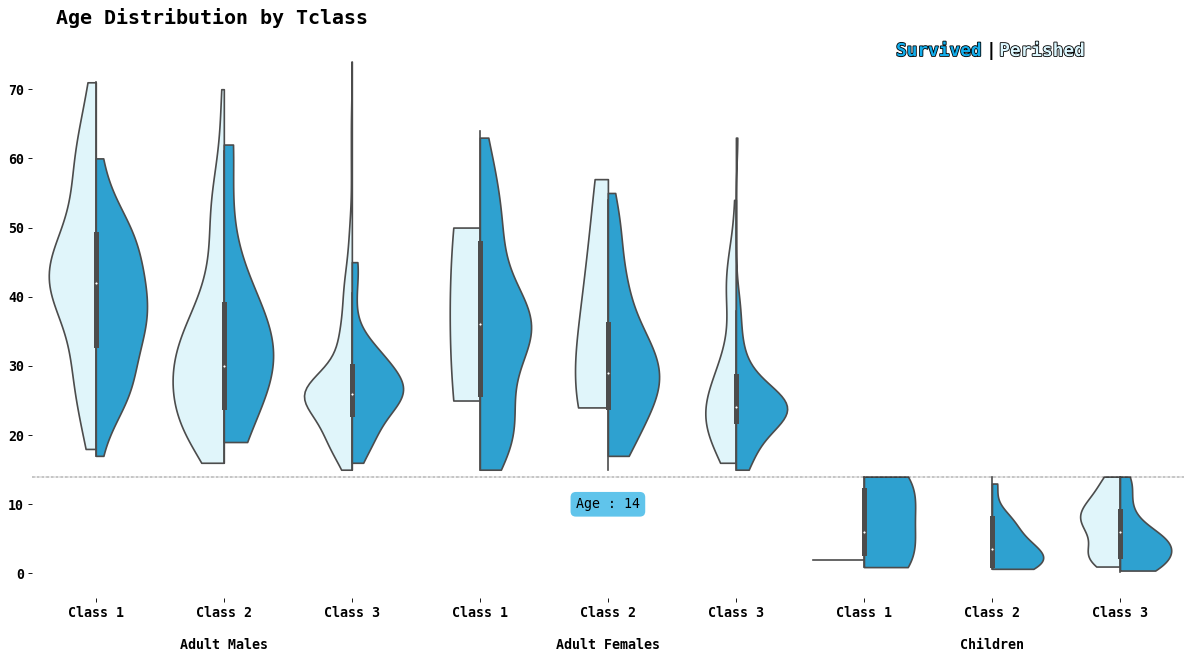

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), dpi = 80)
sns.violinplot(data = df,
               x = 'Tclass', 
               y = 'Age',
               hue = 'Survived', 
               split = True, 
               cut = 0,
               order = ['Mr1', 'Mr2', 'Mr3', 'Mrs1', 'Mrs2', 'Mrs3', 'Children1', 'Children2', 'Children3'],
               palette = {0 : "#DCF7FE", 1 : "#13ADEB"})
age_max_children = df.groupby(['Title'])['Age'].max()[0]
ax.axhline(age_max_children,
           color = 'black', 
           linewidth = 0.4, 
           linestyle = 'dashdot')
ax.annotate(f"Age : {age_max_children :.0f}", 
            xy = (4, age_max_children - 4),
            va = 'center', 
            ha = 'center',
            color = 'black',
            fontsize = 12,
            fontfamily = 'monospace',
            bbox = dict(boxstyle = 'round',
                        pad = 0.4, 
                        facecolor = '#60C4EB',
                        linewidth = 0))
ax.spines[["top", "bottom", "right", "left"]].set_visible(False)
ax.set_xlabel('')
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(['Class 1', 'Class 2\n\nAdult Males', 'Class 3', 'Class 1', 'Class 2\n\nAdult Females', 'Class 3', 'Class 1','Class 2\n\nChildren','Class 3'], 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.set_ylabel('')
ax.set_yticks(np.arange(0, 80, 10))
ax.set_yticklabels(np.arange(0, 80, 10), 
                   fontweight = 'bold', 
                   fontfamily = 'monospace', 
                   fontsize = 12)
ax.get_legend().remove()
fig.text(0.05, 1, "Age Distribution by Tclass",
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'left')
fig.text(0.75, 0.95, 'Survived', 
         fontsize = 16, 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         ha = 'left',
         color = '#13ADEB', 
         path_effects = [pe.withStroke(linewidth = 1.5,
                                       foreground = "black")])
fig.text(0.825, 0.95, '|', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = 'black')
fig.text(0.836, 0.95, 'Perished', 
         fontsize = 16, 
         fontweight = 'bold',
         fontfamily = 'monospace',
         color = '#DCF7FE', 
         path_effects = [pe.withStroke(linewidth = 1.5, 
                                       foreground = "black")])
fig.tight_layout()

- Very few females over 60
- All children survive in Pclass 2
- Above age 45, almost all Pclass 3 adulte males expire. Between 20-30 adult males Pclass 3 have a decent survival chance
- Between 0-24 females in Pclass 1 & 2 have an excellent chance of survival

In [55]:
print(f"Survival rate of women under 24 in class 1 & 2 : {len(df[(df.Sex == 'female') & (df.Age < 24) & (df.Pclass != 3) & (df.Survived == True)]) / len(df[(df.Sex == 'female') & (df.Age < 24) & (df.Pclass != 3) & (df.Survived.notnull())]) * 100 :.2f}%")

Survival rate of women under 24 in class 1 & 2 : 97.62%


# **<div class="alert alert-danger"> 🛠 WORK IN PROGRESS 🛠</div>**

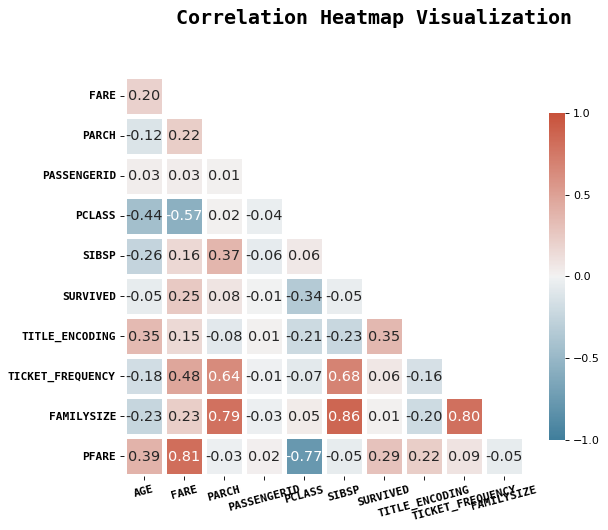

In [56]:
fig, ax = plt.subplots(figsize = (8, 7), dpi = 80)
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
mask = mask[1:, :-1]
corr = df.corr().iloc[1:, :-1]
cmap = sns.diverging_palette(230, 18, as_cmap = True)
sns.heatmap(corr,
            annot = True, 
            fmt = '.2f',  
            vmin = -1, 
            vmax = 1, 
            center = 0, 
            cmap = cmap,
            linewidth = 3,
            mask = mask,
            cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1], "shrink": .65},
            annot_kws = {'size': 13},
            square = True)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], 
           labels = yticks, 
           fontfamily = 'monospace', 
           fontweight = 'bold', 
           rotation = 0)
plt.xticks(plt.xticks()[0], 
           labels = xticks, 
           fontfamily = 'monospace', 
           fontweight = 'bold', 
           rotation = 15)
fig.text(0.90, 0.98, 'Correlation Heatmap Visualization', 
         fontweight = 'bold', 
         fontfamily = 'monospace', 
         fontsize = 18, 
         ha = 'right')
plt.tight_layout()

Measure of association between two categorical features

In [57]:
# Calculate Cramers V statistic for categorial-categorial association
def cramers_corrected_stat(x, y) :
    result= - 1
    if len(x.value_counts()) == 1 :
        print("First variable is constant")
    elif len(y.value_counts()) == 1 :
        print("Second variable is constant")
    else:   
        conf_matrix = pd.crosstab(x, y)

        if conf_matrix.shape[0] == 2 :
            correct = False
        else :
            correct = True

        chi2 = ss.chi2_contingency(conf_matrix, correction = correct)[0]
        n = sum(conf_matrix.sum())
        phi2 = chi2 / n
        r, k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))    
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        result = np.sqrt(phi2corr / min( (kcorr - 1), (rcorr - 1)))
    return round(result, 6)

In [58]:
cramers_corrected_stat(df['Pclass'], df['Survived'])

0.336684

In [59]:
def get_cramer_v(x, y):
    n = len(x)
    cont_table = pd.crosstab(x, y)
    chi_2 = ss.chi2_contingency(cont_table, correction=False)[0]
    v = np.sqrt(chi_2 / (n * (np.min(cont_table.shape) - 1)))
    return v

get_cramer_v(df['Pclass'], df['Survived'])

0.2803590799636696

The most common interpretation of the magnitude of the Cramer’s V is as follows :
- Small Effect Size: V ≤ 0.2
- Medium Effect Size: 0.2 < V ≤ 0.6
- Large Effect Size: 0.6 < V

In [60]:
def Correlation_ratio(categories, values) :
    cat = np.unique(categories, return_inverse = True)[1]
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for i in np.unique(cat):
        subgroup = values[np.argwhere(cat == i).flatten()]
        ssw += np.sum((subgroup - np.mean(subgroup)) ** 2)
        ssb += len(subgroup) * (np.mean(subgroup) - np.mean(values)) ** 2

    return (ssb / (ssb + ssw)) ** .5

coef = Correlation_ratio(df['Pclass'], df['Fare'])

print(f'Eta Squared : {coef ** 2 :.4f}\nEta : {coef :.4f}')

Eta Squared : 0.3720
Eta : 0.6099


The following rules of thumb are used to interpret values for [Eta Squared](https://www.statology.org/eta-squared/) :
- .01 ~ Small effect size
- .06 ~ Medium effect size
- .14 or higher ~ Large effect size

[Text(0, 0, 'Pclass 1')]

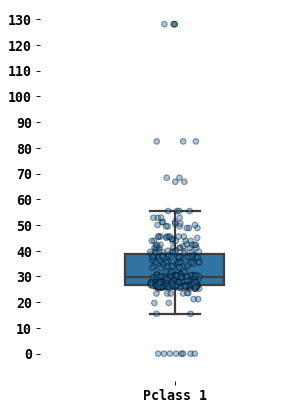

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (4, 6), dpi = 80)
sns.boxplot(data = df.query('Pclass == 1'),
            y = "Pfare",         
            #dodge = True,
            width = 0.4,         # The width of the boxes
            #color = "#13ADEB", 
            linewidth = 2,       # Thickness of the box lines
            showfliers = False)  # Sop showing the fliers
sns.stripplot(data = df.query('Pclass == 1'),
              y = "Pfare",      
              hue = 'Survived',
              #dodge = True,
              #color = '#13ADEB', 
              linewidth = 1,     # Dot outline width
              edgecolor = 'black',
              alpha = 0.4)       # Makes them transparent
sns.despine(offset = 10, trim = True)
# Spines
for s in ["top","left", "right", 'bottom'] :
    ax.spines[s].set_visible(False)
ax.set_yticks(np.arange(0, 140, 10))
ax.set_yticklabels((np.arange(0, 140, 10)), fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)
ax.set_ylabel('')
ax.set_xticks([0])
ax.set_xticklabels(['Pclass 1'], fontweight = 'bold', fontfamily = 'monospace', fontsize = 12)

<AxesSubplot:ylabel='Pfare'>

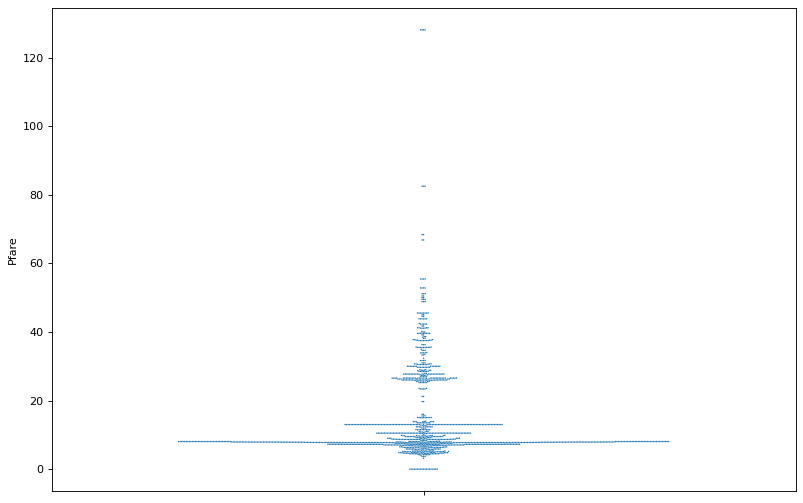

In [62]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.swarmplot(y= df['Pfare'], size = 1.3, data= df.query('Pclass == 1'))
#sns.stripplot(x='Pclass', y=df['Pfare'], data=df, ax=ax[1])

In [63]:
df.query('Pclass == 1')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2,35.64165,Mrs1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2,26.55000,Mrs1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,2,1,25.93125,Mr1
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Mrs,2,1,1,26.55000,Mrs1
23,28.0,A6,S,35.5000,"Sloper, Mr. William Thompson",0,24,1,male,0,1.0,113788,Mr,1,1,1,35.50000,Mr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,17.0,NaN,S,47.1000,"Carrau, Mr. Jose Pedro",0,1295,1,male,0,NaN,113059,Mr,1,2,1,23.55000,Mr1
1295,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,NaN,17765,Mr,1,1,2,27.72080,Mr1
1298,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503,Mr,1,5,3,42.30000,Mr1
1302,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,Mrs,2,3,2,30.00000,Mrs1


In [64]:
df[df.Pclass == 1]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2,35.64165,Mrs1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2,26.55000,Mrs1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,2,1,25.93125,Mr1
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Mrs,2,1,1,26.55000,Mrs1
23,28.0,A6,S,35.5000,"Sloper, Mr. William Thompson",0,24,1,male,0,1.0,113788,Mr,1,1,1,35.50000,Mr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,17.0,NaN,S,47.1000,"Carrau, Mr. Jose Pedro",0,1295,1,male,0,NaN,113059,Mr,1,2,1,23.55000,Mr1
1295,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,NaN,17765,Mr,1,1,2,27.72080,Mr1
1298,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,NaN,113503,Mr,1,5,3,42.30000,Mr1
1302,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,Mrs,2,3,2,30.00000,Mrs1


<AxesSubplot:xlabel='Embarked', ylabel='Pfare'>

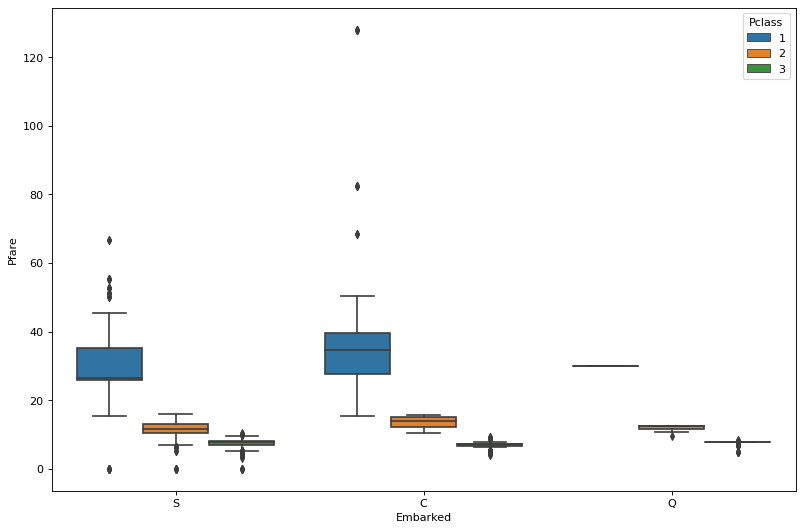

In [65]:
fig, ax = plt.subplots(figsize=(12,8), dpi = 80)
sns.boxplot(data = df, y = df.Pfare, x = df.Embarked, hue = df.Pclass)

In [66]:
df.loc[(df.Pfare < 20) & (df.Pclass == 1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass
263,45.0,B94,S,28.5,"Harrison, Mr. William",0,264,1,male,0,0.0,112059,Mr,1,1,1,0.0,Mr1
270,28.0,NaN,S,31.0,"Cairns, Mr. Alexander",0,271,1,male,0,0.0,113798,Mr,1,2,1,15.5,Mr1
633,29.0,NaN,S,28.5,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052,Mr,1,1,1,0.0,Mr1
806,39.0,A36,S,28.5,"Andrews, Mr. Thomas Jr",0,807,1,male,0,0.0,112050,Mr,1,1,1,0.0,Mr1
815,39.0,B102,S,60.0,"Fry, Mr. Richard",0,816,1,male,0,0.0,112058,Mr,1,2,1,0.0,Mr1
822,38.0,NaN,S,28.5,"Reuchlin, Jonkheer. John George",0,823,1,male,0,0.0,19972,Mr,1,1,1,0.0,Mr1
842,30.0,NaN,C,31.0,"Serepeca, Miss. Augusta",0,843,1,female,0,1.0,113798,Mrs,2,2,1,15.5,Mrs1
853,16.0,D28,S,39.4,"Lines, Miss. Mary Conover",1,854,1,female,0,1.0,PC 17592,Mrs,2,2,2,19.7,Mrs1
872,33.0,B51 B53 B55,S,28.5,"Carlsson, Mr. Frans Olof",0,873,1,male,0,0.0,695,Mr,1,1,1,0.0,Mr1
1157,42.0,NaN,S,28.5,"Chisholm, Mr. Roderick Robert Crispin",0,1158,1,male,0,NaN,112051,Mr,1,1,1,0.0,Mr1


In [67]:
df.loc[(df.Pfare > 15) & (df.Pclass == 2)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass
9,17.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,2,2,15.0354,Mrs2
15,55.0,NaN,S,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,female,0,1.0,248706,Mrs,2,1,1,16.0000,Mrs2
122,32.5,NaN,C,30.0708,"Nasser, Mr. Nicholas",0,123,2,male,1,0.0,237736,Mr,1,2,2,15.0354,Mr2
135,23.0,NaN,C,15.0458,"Richard, Mr. Emile",0,136,2,male,0,0.0,SC/PARIS 2133,Mr,1,1,1,15.0458,Mr2
181,30.0,NaN,C,15.0500,"Pernot, Mr. Rene",0,182,2,male,0,0.0,SC/PARIS 2131,Mr,1,1,1,15.0500,Mr2
942,27.0,NaN,C,15.0333,"Pulbaum, Mr. Franz",0,943,2,male,0,NaN,SC/PARIS 2168,Mr,1,1,1,15.0333,Mr2
945,30.0,NaN,C,15.5792,"Mangiavacchi, Mr. Serafino Emilio",0,946,2,male,0,NaN,SC/A.3 2861,Mr,1,1,1,15.5792,Mr2
1001,41.0,NaN,C,15.0458,"Stanton, Mr. Samuel Ward",0,1002,2,male,0,NaN,237734,Mr,1,1,1,15.0458,Mr2
1076,40.0,NaN,S,16.0000,"Maybery, Mr. Frank Hubert",0,1077,2,male,0,NaN,239059,Mr,1,1,1,16.0000,Mr2
1192,30.0,D,C,15.0458,"Malachard, Mr. Noel",0,1193,2,male,0,NaN,237735,Mr,1,1,1,15.0458,Mr2


In [68]:
df[['FamilySize','Ticket_frequency']].max()

FamilySize          11
Ticket_frequency    11
dtype: int64

In [69]:
df['GroupSize'] = df[['FamilySize','Ticket_frequency']].max(axis = 1)

<AxesSubplot:xlabel='GroupSize', ylabel='count'>

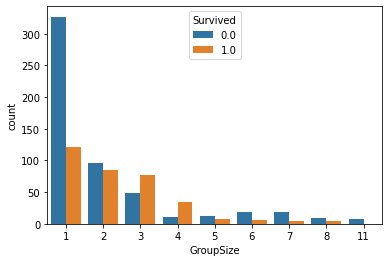

In [70]:
sns.countplot(x='GroupSize', hue='Survived', data=df)

In [71]:
df['First_name'] = df.Name.str.split(" ").map(lambda x: x[0])

In [72]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass,GroupSize,First_name
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1,2,7.25000,Mr3,2,"Braund,"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2,35.64165,Mrs1,2,"Cumings,"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Mrs,2,1,1,7.92500,Mrs3,1,"Heikkinen,"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2,26.55000,Mrs1,2,"Futrelle,"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,1,8.05000,Mr3,1,"Allen,"
5,26.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,1,1,1,8.45830,Mr3,1,"Moran,"
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,1,2,1,25.93125,Mr1,2,"McCarthy,"
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Children,0,5,5,4.21500,Children3,5,"Palsson,"
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,2,3,3,3.71110,Mrs3,3,"Johnson,"
9,17.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,2,2,15.03540,Mrs2,2,"Nasser,"


In [73]:
df['Name_frequency'] = df.groupby(['First_name'])['First_name'].transform('count')

<AxesSubplot:xlabel='Name_frequency', ylabel='count'>

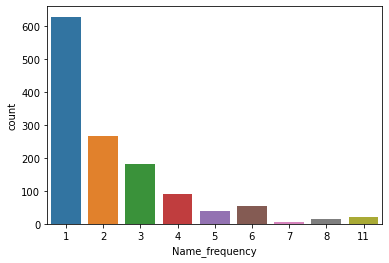

In [74]:
sns.countplot(data = df, x = df.Name_frequency)

In [75]:
df[(df['Name_frequency'] == 11) & (df['FamilySize'] == 1)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass,GroupSize,First_name,Name_frequency
68,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",0,69,3,female,0,...,3101281,Mrs,2,1,1,7.9250,Mrs3,1,"Andersson,",11
146,27.0,NaN,S,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,147,3,male,0,...,350043,Mr,1,1,1,7.7958,Mr3,1,"Andersson,",11
1105,38.0,NaN,S,7.7750,"Andersson, Miss. Ida Augusta Margareta",0,1106,3,female,0,...,347091,Mrs,2,1,1,7.7750,Mrs3,1,"Andersson,",11
1211,26.0,NaN,S,7.7750,"Andersson, Mr. Johan Samuel",0,1212,3,male,0,...,347075,Mr,1,1,1,7.7750,Mr3,1,"Andersson,",11


In [76]:
df[(df['Ticket'] == 370160)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Title,Title_Encoding,Ticket_frequency,FamilySize,Pfare,Tclass,GroupSize,First_name,Name_frequency
179,36.0,NaN,S,27.9,"Leonard, Mr. Lionel",0,180,3,male,0,...,370160,Mr,1,6,1,0.0,Mr3,6,"Leonard,",1
271,25.0,NaN,S,27.9,"Tornquist, Mr. William Henry",0,272,3,male,0,...,370160,Mr,1,6,1,0.0,Mr3,6,"Tornquist,",1
302,19.0,NaN,S,27.9,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,...,370160,Mr,1,6,1,0.0,Mr3,6,"Johnson,",6
597,49.0,NaN,S,27.9,"Johnson, Mr. Alfred",0,598,3,male,0,...,370160,Mr,1,6,1,0.0,Mr3,6,"Johnson,",6
1014,27.0,NaN,S,27.9,"Carver, Mr. Alfred John",0,1015,3,male,0,...,370160,Mr,1,6,1,0.0,Mr3,6,"Carver,",1
1043,60.5,NaN,S,27.9,"Storey, Mr. Thomas",0,1044,3,male,0,...,370160,Mr,1,6,1,NaN,Mr3,6,"Storey,",1


In [77]:
df['Ticket_moins_Family'] = df['Ticket_frequency'] - df['FamilySize']

<AxesSubplot:xlabel='Ticket_moins_Family', ylabel='count'>

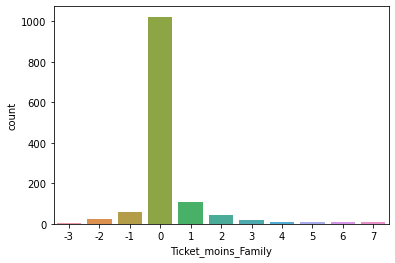

In [78]:
sns.countplot(data = df, x = df.Ticket_moins_Family)